In [1]:
%cd /Users/vitthal/Documents/Research/DataScience/MedicalResearch/mgmt/Codes

/Users/vitthal/Documents/Research/DataScience/MedicalResearch/mgmt/Codes


In [2]:
path = '/Users/vitthal/Documents/Research/DataScience/MedicalResearch/mgmt/'
block_h, block_w = (32,32)
load_Case_1_Model = 'Model_Case_1_1.h5'
load_Case_2_Model = 'Model_Case_2_4.h5'
load_Case_3_Model = 'Model_Case_3_2.h5'
load_Case_4_Model = 'Model_Case_4_3.h5'
load_Case_5_Model = 'Model_Case_5_4.h5'

In [3]:
# Function Definition --> Loading preprocessed data from the file

def Load_Data():
    pickle_in = open(Case_Path + '/' + 'X_test.pickle', 'rb')
    X = pickle.load(pickle_in)  # Loading Features

    pickle_in = open(Case_Path + '/' + 'y_test.pickle', 'rb')
    y = pickle.load(pickle_in)  # Loading Labels

    print('Shape of X:\t', X.shape), print('Shape of y:\t', y.shape)

    return X, y

In [4]:
# Function Definition --> Loading the model

def Load_Model():
    if case == 'Case_1':
        my_model = tf.keras.models.load_model(path + 'Outputs/' + load_Case_1_Model)
    elif case == 'Case_2':
        my_model = tf.keras.models.load_model(path + 'Outputs/' + load_Case_2_Model)
    elif case == 'Case_3':
        my_model = tf.keras.models.load_model(path + 'Outputs/' + load_Case_3_Model)
    elif case == 'Case_4':
        my_model = tf.keras.models.load_model(path + 'Outputs/' + load_Case_4_Model)
    elif case == 'Case_5':
        my_model = tf.keras.models.load_model(path + 'Outputs/' + load_Case_5_Model)
    
    return my_model

In [5]:
# Function Definition --> Plotting the AUC-ROC Curve

def Plotting_AUC_ROC_Curve(X, y, model):
    import sklearn.metrics as metrics
    import matplotlib.pyplot as plt

    # calculate the fpr and tpr for all thresholds of the classification
    probs = model.predict(X)
    y_preds = np.argmax(model.predict(X), axis=-1)
    preds = probs[:,1]
    fpr, tpr, threshold = metrics.roc_curve(y, preds)
    roc_auc = metrics.auc(fpr, tpr)

    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])

    plt.title('Receiver Operating Characteristic')
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')

    plt.show()
    acc = metrics.accuracy_score(y, y_preds)
    print("Accuracy: ", acc)
    plt.savefig(path + 'Outputs/AUC-ROC_Graph_' + case + '.png')

/Users/vitthal/miniforge3/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


Case_5
Shape of X:	 (8036, 32, 32, 1)
Shape of y:	 (8036,)
Length of the total test data: 8036
Metal device set to: Apple M1 Pro

systemMemory: 16.00 GB
maxCacheSize: 5.33 GB



2022-09-05 17:19:36.839067: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-09-05 17:19:36.839369: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


my_model


2022-09-05 17:19:37.796185: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2022-09-05 17:19:37.837400: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


252/252 [==============================] - 1s 3ms/step


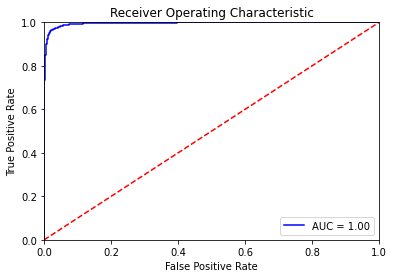

Accuracy:  0.9711299153807864


Case_2
Shape of X:	 (8037, 32, 32, 1)
Shape of y:	 (8037,)
Length of the total test data: 8037
my_model
 64/252 [======>.......................] - ETA: 0s

2022-09-05 17:19:40.159589: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


252/252 [==============================] - 1s 3ms/step


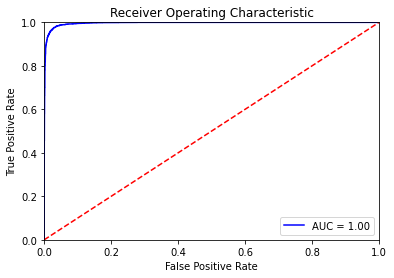

Accuracy:  0.9717556302102774


Case_3
Shape of X:	 (8037, 32, 32, 1)
Shape of y:	 (8037,)
Length of the total test data: 8037
my_model
 54/252 [=====>........................] - ETA: 0s

2022-09-05 17:19:41.989768: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


252/252 [==============================] - 1s 3ms/step


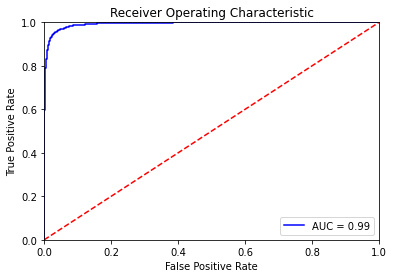

Accuracy:  0.9502301853925594


Case_4
Shape of X:	 (8037, 32, 32, 1)
Shape of y:	 (8037,)
Length of the total test data: 8037
my_model
 60/252 [======>.......................] - ETA: 0s

2022-09-05 17:19:43.673624: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


252/252 [==============================] - 1s 3ms/step


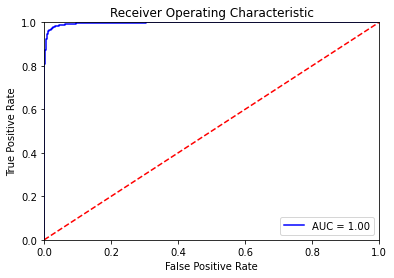

Accuracy:  0.9690182904068683


Case_1
Shape of X:	 (8037, 32, 32, 1)
Shape of y:	 (8037,)
Length of the total test data: 8037
my_model
 56/252 [=====>........................] - ETA: 0s

2022-09-05 17:19:45.321828: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


252/252 [==============================] - 1s 3ms/step


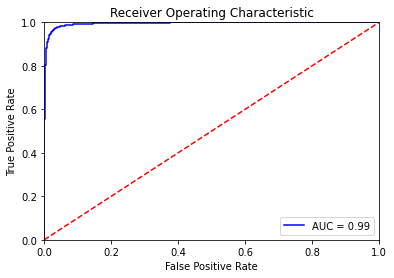

Accuracy:  0.968147318651238


Done..!!


<Figure size 432x288 with 0 Axes>

In [6]:
# All Function Calls
import os
from tqdm import tqdm
import tensorflow as tf
from tensorflow.keras.models import load_model
from keras.utils.np_utils import to_categorical
import numpy as np
import pickle

PATH = path + 'Data/'
Work_Dir = PATH + 'Working_Data/'
Result_File = path + 'Outputs/Final_Test_Result.txt'
workdir=os.listdir(Work_Dir)
if '.DS_Store' in workdir:
    workdir.remove('.DS_Store')
# Calling Functions:
for case in workdir:
    print(case)
    Case_Path = os.path.join(Work_Dir, case)  # Joining path for "Cases'.
    
    X, y = Load_Data()

    # Printing Length of the test data.
    print('Length of the total test data: ' + str(X.shape[0]))
    
    results = []

    # Function call --> Loading the model
    my_model = Load_Model()
    print("my_model")
    
    # Function Call --> Plotting the AUC-ROC Curve
    Plotting_AUC_ROC_Curve(X, y, my_model)

    print('\n')

os.chdir(path)
print('Done..!!')